## FOR GOOGLE COLLAB USERS ONLY: Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/My Drive/14-Teaching/JoSSIS/data/'
filename = 'Movie-Reviews.txt'
file = path+filename

## Import Libraries

In [3]:
import pandas as pd
#install textblob if not already installed using "pip install -U textblob"
from textblob import TextBlob
import matplotlib.pyplot as plt; plt.style.use('seaborn')

<ipython-input-3-5571f8cf9ee4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  import matplotlib.pyplot as plt; plt.style.use('seaborn')


## 01 Preparing Data for Sentiment Analysis

In [4]:
# read text file as pandas data frame
df_reviews = pd.read_csv(file, header=None, names=['sent'], sep='|')
reviews=df_reviews['sent']

## 02 Simple Sentiment on a text file

In [5]:
filename = 'dublin-festivities.txt'
file = path+filename
with open(file, encoding="utf-8") as f:
    data = f.read()
sentiment = TextBlob(data)
print(sentiment.polarity)

0.18492865159531824


## Todo: Open own file and calculate the sentiment polarity

In [ ]:
## todo


## 03 Finding Sentiments by Review

In [ ]:
print('{:<80} : {:>8} : {:>12}'.format("Review", "Polarity", "Subjectivity") )

for review in reviews:
    # Find sentiment of a review
    sentiment = TextBlob(review)
    # Print individual sentiments
    print('{:<80} : {:>8} : {:>12}'.format(review[:80], f"{sentiment.polarity:01.2f}", f"{sentiment.subjectivity:01.2f}") )

Review                                                                           : Polarity : Subjectivity
When your main character in a superhero movie is unwatchable, you already have a :     0.17 :         0.33
Her performance was forced, uninspiring and flat! Not looking forward to the nex :    -0.11 :         0.11
I couldn't believe how boring this movie was. The acting is horrible, the action :    -0.51 :         0.72
Nothing beats a good marvel movie, and this is definitely a good marvel movie    :     0.70 :         0.60
This movie did for Marvel what Wonder Woman did for DC. Captain Marvel is a grea :     0.60 :         0.68
Captain Marvel just became my favorite superhero of all time. This movie was fun :     0.40 :         0.64
This is a very controversial Marvel film. Which seems to be a running trend with :     0.36 :         0.62
Unfortunately, despite carrying many elements of previous Marvel installments, i :    -0.14 :         0.48
It's worth watching just for the fact

## 03 Summarizing Sentiment

Final summarized counts : [3, 4, 3]

 Pie Representation 
-------------------


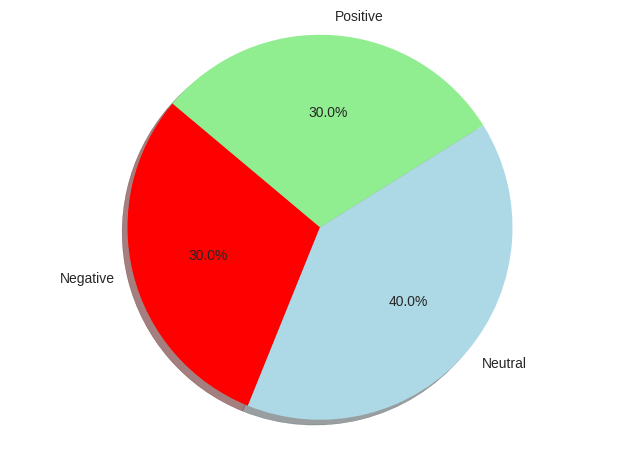

In [ ]:
# Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
# Initialize count array
values = [0, 0, 0]

# Categorize each review
for review in reviews:
    sentiment = TextBlob(review)

    # convert polarity
    # 0 = (Negative), 1 = (Neutral), 2 = (Positive)

    if sentiment.polarity >= 0.4:
        polarity  = 2
    elif sentiment.polarity > 0:
        polarity  = 1
    else:
        polarity = 0

    # add the summary array
    values[polarity] = values[polarity] + 1

print("Final summarized counts :", values)

# Set colors by label
colors = ["Red", "LightBlue", "LightGreen"]

print("\n Pie Representation \n-------------------")

# Plot a pie chart
plt.pie(values, labels=labels, colors=colors,
        autopct='%1.1f%%',# autopct enables you to display the percent value using Python string formatting
        shadow=True, startangle=140)
plt.axis('equal')
plt.show()